In [1]:
from qualtran.bloqs.basic_gates import Identity as I
from qualtran.bloqs.block_encoding import LinearCombination, Product, Unitary
import numpy as np
from qualtran.bloqs.block_encoding.sparse_matrix import (
    ExplicitEntryOracle,
    SparseMatrix,
    TopLeftRowColumnOracle,
)

data = np.array([[0.0, 0.25], [1 / 3, 0.467]])
row_oracle = col_oracle = TopLeftRowColumnOracle(1)
entry_oracle = ExplicitEntryOracle(1, data, entry_bitsize=10)
a = SparseMatrix(row_oracle, col_oracle, entry_oracle, eps=0)
t_2 = LinearCombination.of_terms((2.0, Product.of(a, a)), (-1.0, Unitary(I())))

In [2]:
from qualtran import BloqInstance
from qualtran._infra.controlled import Controlled
from qualtran.bloqs.bookkeeping.auto_partition import AutoPartition
from qualtran.bloqs.bookkeeping.partition import Partition
from qualtran.bloqs.data_loading.qrom_base import QROMBase
from qualtran.bloqs.multiplexers.apply_lth_bloq import ApplyLthBloq
from qualtran.bloqs.multiplexers.black_box_select import BlackBoxSelect
from qualtran.bloqs.state_preparation.black_box_prepare import BlackBoxPrepare


def should_flatten(binst: BloqInstance):
    if isinstance(
        binst.bloq,
        (QROMBase, BlackBoxPrepare, TopLeftRowColumnOracle, ExplicitEntryOracle, Partition),
    ):
        return False
    if isinstance(binst.bloq, (BlackBoxSelect, ApplyLthBloq, AutoPartition)):
        return True
    if isinstance(binst.bloq, Controlled) and isinstance(
        binst.bloq.subbloq, (AutoPartition, Product, SparseMatrix)
    ):
        return True
    return False

In [3]:
bloq = t_2.decompose_bloq().flatten(should_flatten)

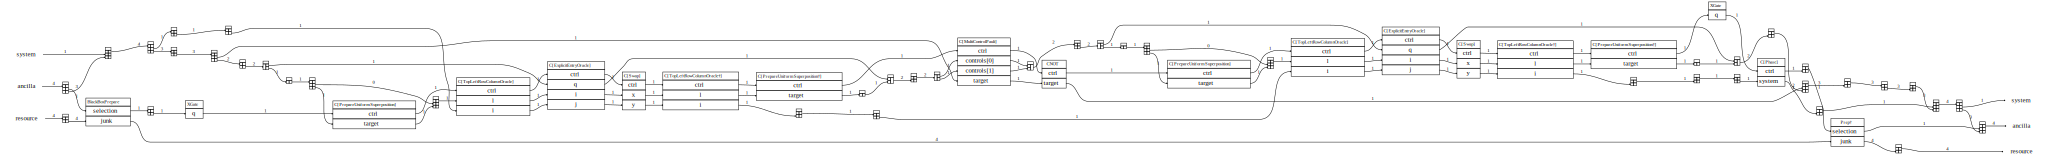

In [4]:
from qualtran.drawing import show_bloq, PrettyGraphDrawer

show_bloq(bloq)

In [5]:
graph = PrettyGraphDrawer(bloq).get_graph()
graph.write_pdf(f"linear_combination.pdf")